# POLI JÚNIOR + TOTAL PASS
### ANÁLISE DO REGRESSOR

Importando bibliotecas necessárias:

In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from random import randint
from sklearn.manifold import TSNE
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from futures3.thread import ThreadPoolExecutor
from tqdm import tqdm
from pymannkendall import original_test
import pytz
from pyarrow.parquet import ParquetFile
import pyarrow as pa
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
# Evitar warnings:
import warnings
warnings.filterwarnings("ignore")

Leitura da base de resultado que deseja-se analisar:

In [63]:
df = pd.read_csv('Tabelas/results_365_cluster_2.csv')

Análise de categorias por porcentagem de confiança

In [64]:
verdadeiros_positivos = []
falsos_positivos = []
verdadeiros_negativos = []
falsos_negativos = []
porcentagens = [0.5,0.6,0.7,0.8,0.9,0.95]
for porcentagem in porcentagens:
    print(f'Porcentagem: {porcentagem}')
    df['prediction_percentage'] = df['churn probability'] > porcentagem
    # utilizando matriz de confusão
    matriz = confusion_matrix(df['churn_at_dt'], df['prediction_percentage'])
    verdadeiros_positivos.append(matriz[1, 1])
    falsos_positivos.append(matriz[0, 1])
    verdadeiros_negativos.append(matriz[0, 0])
    falsos_negativos.append(matriz[1, 0])
    print(f'Verdadeiros positivos: {verdadeiros_positivos}')
    print(f'Falsos positivos: {falsos_positivos}')
    print(f'Verdadeiros negativos: {verdadeiros_negativos}')
    print(f'Falsos negativos: {falsos_negativos}')
    print('--------------------------------------------------')


Porcentagem: 0.5
Verdadeiros positivos: [7501]
Falsos positivos: [1799]
Verdadeiros negativos: [439]
Falsos negativos: [509]
--------------------------------------------------
Porcentagem: 0.6
Verdadeiros positivos: [7501, 6985]
Falsos positivos: [1799, 1536]
Verdadeiros negativos: [439, 702]
Falsos negativos: [509, 1025]
--------------------------------------------------
Porcentagem: 0.7
Verdadeiros positivos: [7501, 6985, 6042]
Falsos positivos: [1799, 1536, 1202]
Verdadeiros negativos: [439, 702, 1036]
Falsos negativos: [509, 1025, 1968]
--------------------------------------------------
Porcentagem: 0.8
Verdadeiros positivos: [7501, 6985, 6042, 4510]
Falsos positivos: [1799, 1536, 1202, 737]
Verdadeiros negativos: [439, 702, 1036, 1501]
Falsos negativos: [509, 1025, 1968, 3500]
--------------------------------------------------
Porcentagem: 0.9
Verdadeiros positivos: [7501, 6985, 6042, 4510, 2324]
Falsos positivos: [1799, 1536, 1202, 737, 257]
Verdadeiros negativos: [439, 702, 1036

Plot de grupos por porcentagem de confiança:

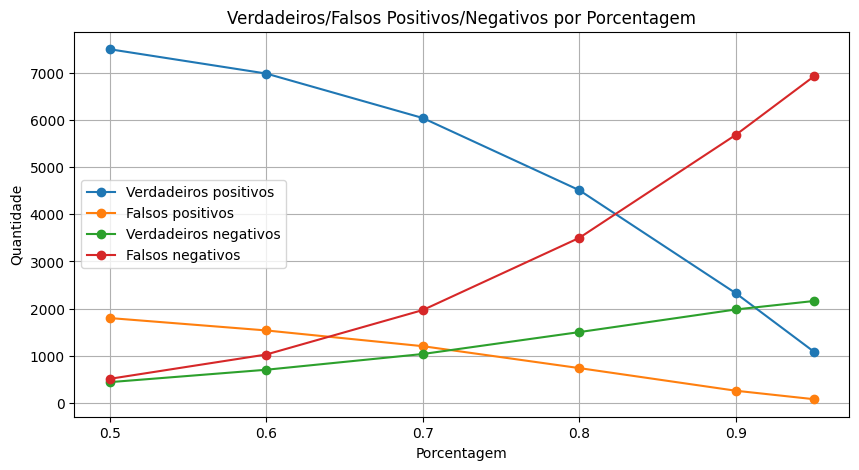

In [65]:
# Gráfico de linha para cada porcentagem
plt.figure(figsize=(10, 5))
plt.plot(porcentagens, verdadeiros_positivos, label='Verdadeiros positivos', marker='o')
plt.plot(porcentagens, falsos_positivos, label='Falsos positivos', marker='o')
plt.plot(porcentagens, verdadeiros_negativos, label='Verdadeiros negativos', marker='o')
plt.plot(porcentagens, falsos_negativos, label='Falsos negativos', marker='o')
plt.xlabel('Porcentagem')
plt.ylabel('Quantidade')
plt.title('Verdadeiros/Falsos Positivos/Negativos por Porcentagem')
plt.legend()
plt.grid()
plt.show()

Verdadeiros positivos: Clientes que cancelaram e o modelo previu cancelamento. Nessa situação, a Total Pass teria a possibilidade de evitar o cancelamento.
Falsos positivos: Clientes que não cancelaram e o modelo previu cancelamento. Nessa situação, a Total Pass perderia capital, atuando sobre um cliente que não cancelaria.
Verdadeiros negativos: Clientes que não cancelaram e o modelo previu não cancelamento. Nessa situação, a Total Pass não gasta capital desnecessariamente.
Falsos negativos: Clientes que cancelaram e o modelo previu não cancelamento. Nessa situação, a Total Pass perdeu a chance de investir na retenção desses clientes.

Portanto, o cenário ideal é maximizar os verdadeiros positivos e verdadeiros negativos, minimizando os falsos positivos e falsos negativos, para garantir uma abordagem eficaz na retenção de clientes e na otimização do capital da Total Pass.

Plot de precisão:

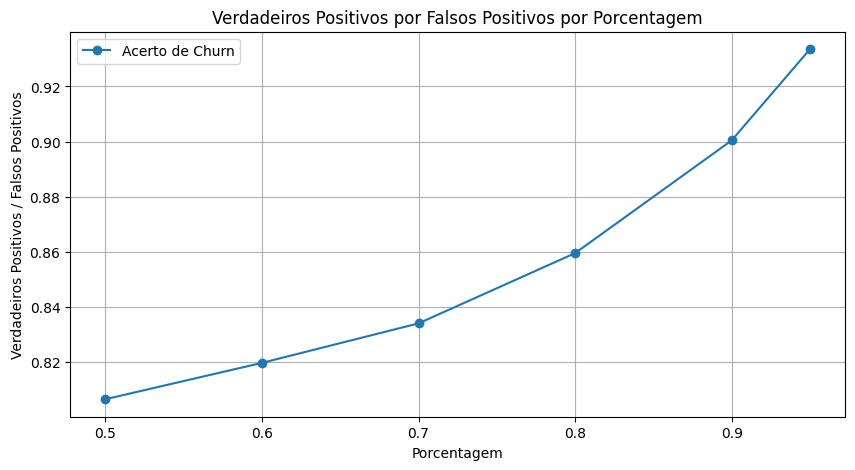

In [66]:
recall = []
for i in range(len(verdadeiros_positivos)):
    recall.append(verdadeiros_positivos[i] / (verdadeiros_positivos[i] + falsos_positivos[i]))
plt.figure(figsize=(10, 5))
plt.plot(porcentagens, recall, label='Acerto de Churn', marker='o')
plt.xlabel('Porcentagem')
plt.ylabel('Verdadeiros Positivos / Falsos Positivos')
plt.title('Verdadeiros Positivos por Falsos Positivos por Porcentagem')
plt.legend()
plt.grid()
plt.show()

Plot para analisar recall:

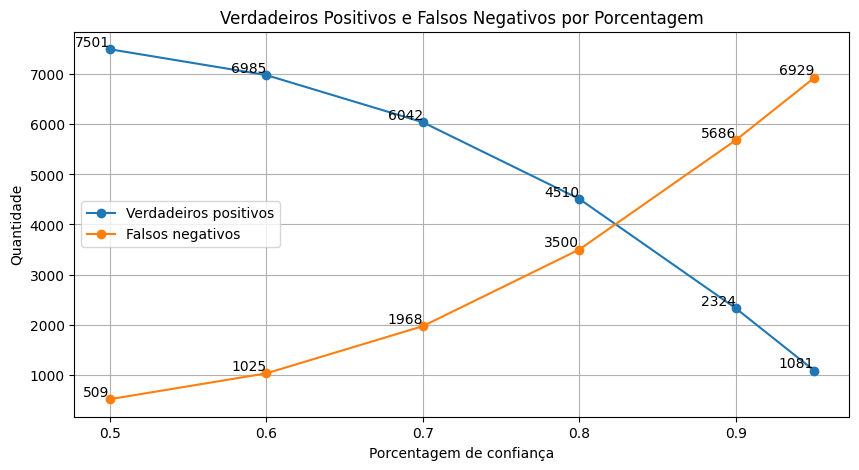

In [67]:
# Gráfico de linha para cada porcentagem
plt.figure(figsize=(10, 5))
plt.plot(porcentagens, verdadeiros_positivos, label='Verdadeiros positivos', marker='o')
plt.plot(porcentagens, falsos_negativos, label='Falsos negativos', marker='o')
plt.xlabel('Porcentagem de confiança')
plt.ylabel('Quantidade')
plt.title('Verdadeiros Positivos e Falsos Negativos por Porcentagem')

for x, y in zip(porcentagens, falsos_negativos):
    plt.text(x, y, f'{y}', ha='right', va='bottom')
for x, y in zip(porcentagens, verdadeiros_positivos):
    plt.text(x, y, f'{y}', ha='right', va='bottom')

plt.legend()
plt.grid()
plt.show()